In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%%R

install.packages("ggalt")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  64


In [6]:
%%R

require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')

Loading required package: ggplot2
Loading required package: readr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr


In [66]:
%%R

df <- read_csv('final.csv')
df

Rows: 24 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): month, category
num (1): value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 24 × 3
   month category value
   <chr> <chr>    <dbl>
 1 Jan.  supply    987 
 2 Feb.  supply    956.
 3 Mar.  supply   1088 
 4 Apr.  supply   1067 
 5 May   supply   1017.
 6 Jun.  supply   1016 
 7 Jul.  supply   1047 
 8 Aug.  supply   1077 
 9 Sep.  supply   1062 
10 Oct.  supply   1195 
# ℹ 14 more rows
# ℹ Use `print(n = ...)` to see more rows


In [67]:
%%R

df$month <- factor(df$month, levels = c(
  "Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", 
  "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."
))

In [78]:
%%R

install.packages("stringr")

During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘stringr’ ...
** package ‘stringr’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
*** copying figures
** building package indices


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (stringr)


Installing package into ‘/opt/homebrew/lib/R/4.4/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/stringr_1.5.1.tar.gz'
Content type 'application/x-gzip' length 176599 bytes (172 KB)
downloaded 172 KB


The downloaded source packages are in
	‘/private/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/RtmpouYkUF/downloaded_packages’


In [83]:
%%R

library('stringr')

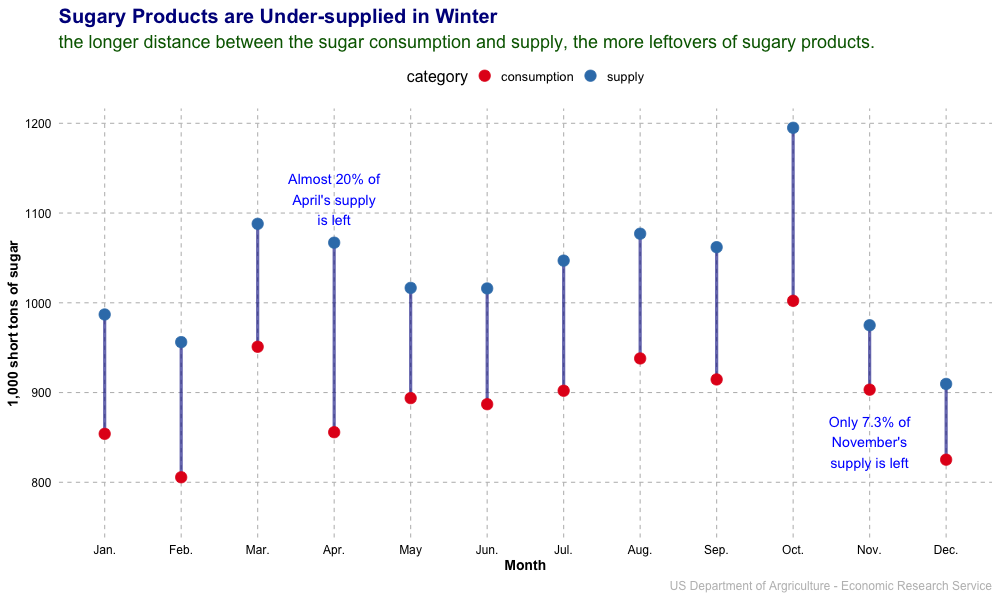

In [127]:
%%R -w 1000 -h 600

ggplot(df) +
  aes(x = month, y = value) +
  geom_line(size = 1.5, alpha = 0.6, color = 'darkblue') +
  geom_point(aes(color = category), size = 5) +  
  scale_color_brewer(palette = "Set1", direction = 1) +
  labs(
      x = 'Month',
      y = '1,000 short tons of sugar',
      title = 'Sugary Products are Under-supplied in Winter',
      subtitle = 'the longer distance between the sugar consumption and supply, the more leftovers of sugary products.',
      caption = 'US Department of Argriculture - Economic Research Service') +
  theme_minimal(base_size = 16) +
  theme(
    legend.position = "top",
    text = element_text(size = 16),
    plot.title = element_text(size = 20, face = "bold", color = "darkblue"),
    plot.subtitle = element_text(size = 18, color = "darkgreen"),
    plot.caption = element_text(size = 12, color = "gray"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12, color = "black"),
    panel.grid.major = element_line(color = "gray", linetype = "dashed", size = 0.5),
    panel.grid.minor = element_blank()
  ) +
  annotate("text", x = "Nov.", y = 760, label = str_wrap("Only 7.3% of November's supply is left", width = 15), color = "blue", size = 5, vjust = -1) +
  annotate("text", x = "Apr.", y = 1030, label = str_wrap("Almost 20% of April's supply is left", width = 15), color = "blue", size = 5, vjust = -1)
